<a href="https://colab.research.google.com/github/Jemuna/Ibee-Analysis/blob/Seasonality-and-trend-analysis/Retail_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [ ]:
df=pd.read_csv("retail_sales_dataset.csv")

In [ ]:
print(df.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


Filter the Data


In [ ]:
df_beauty = df[df['Product Category'] == 'Beauty']

Group daily sales for beauty products


In [ ]:
beauty_sales = df_beauty.groupby('Date')['Total Amount'].sum().reset_index()
print(beauty_sales.head())

         Date  Total Amount
0  2023-01-01          1500
1  2023-01-02            25
2  2023-01-03           600
3  2023-01-04          1090
4  2023-01-05            50


Rename Columns for Prophet

In [ ]:
beauty_sales.rename(columns={"Date":"ds","Total Amount":"y"},inplace=True)

In [ ]:
beauty_sales['ds'] = pd.to_datetime(beauty_sales['ds'])


In [ ]:
beauty_sales.set_index('ds', inplace=True)


In [ ]:
beauty_weekly_sales = beauty_sales.resample('W').sum().reset_index()

In [ ]:

holidays = pd.DataFrame({
    'holiday': 'diwali',
    'ds': pd.to_datetime(['2023-11-12']),
    'lower_window': 0,
    'upper_window': 1  })


In [ ]:
model=Prophet(holidays=holidays,
              weekly_seasonality=True,
              yearly_seasonality=True,
              daily_seasonality=False)
model.fit(beauty_weekly_sales)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpcblu8mzi/m6uzug4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpcblu8mzi/x2oy9_93.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61318', 'data', 'file=/tmp/tmpcblu8mzi/m6uzug4g.json', 'init=/tmp/tmpcblu8mzi/x2oy9_93.json', 'output', 'file=/tmp/tmpcblu8mzi/prophet_modelorlf8ziz/prophet_model-20250717163649.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:36:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:36:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=12,freq='W')
forecast=model.predict(future)

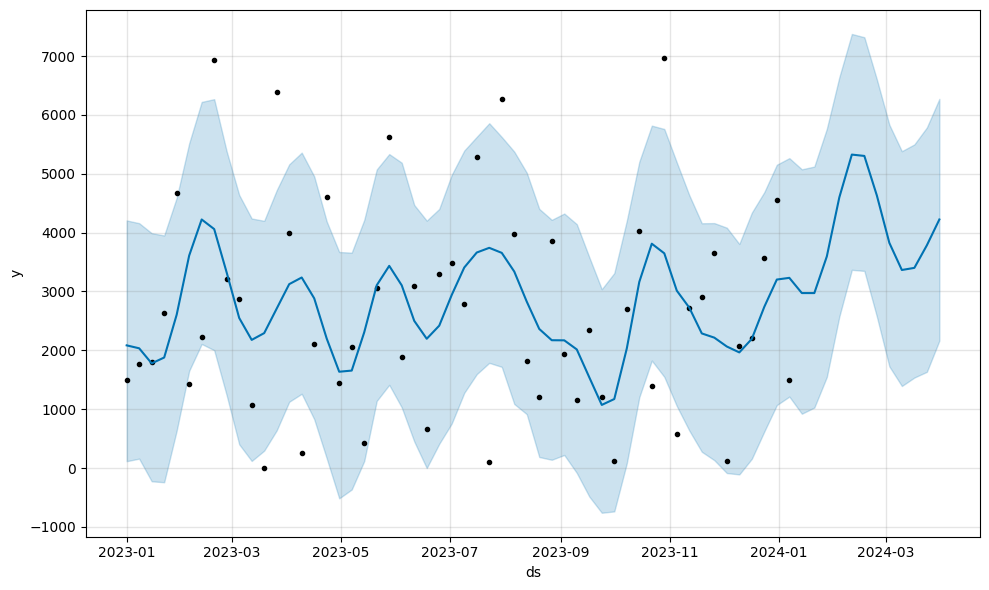

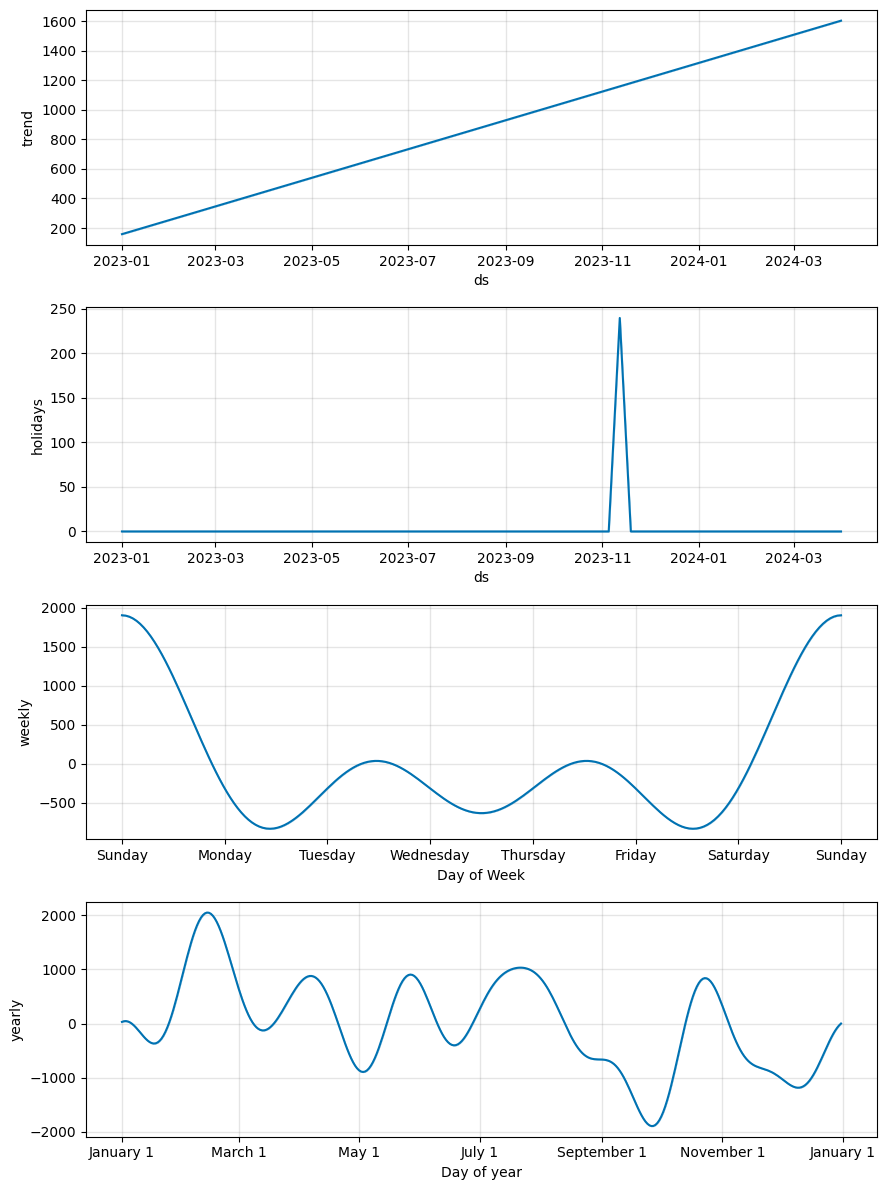

In [ ]:
model.plot(forecast)
model.plot_components(forecast)
plt.show()

In [ ]:
future_only = forecast[forecast['ds'] > weekly_sales['ds'].max()]
total_predicted_sales = future_only['yhat'].sum()
print(f"Total Forecasted Sales (next 12 weeks): ₹{total_predicted_sales:.2f}")


Total Forecasted Sales (next 12 weeks): ₹48004.87


In [ ]:
lower = future_only['yhat_lower'].sum()
upper = future_only['yhat_upper'].sum()

print(f"Expected Sales Range: ₹{lower:.2f} to ₹{upper:.2f}")


Expected Sales Range: ₹23824.30 to ₹72679.97
